In [1]:
#importing necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('training_set.csv',index_col=0)  #load training data

In [4]:
df.head() #display the first five rows of our dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


### **Data Cleaning and pre-processing**

In [5]:
df.info() #collect normal information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

There are total 3910 entries available for 57 features and 1 dependent target. All the feature column given  is of flot data type except the last two columns X56 and X57. Target is of int with 0 and 1 value.

In [6]:
df.shape

(3910, 58)

In [7]:
# Observe the data using describe function
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

**Observation**



1.   Here, the Max value is significantly greater than both Mean and the Median value. Hence, we can sense the presence of Outliers. But in this case mean and median is 0 for most of columns and zero does not make any sense that categorize other values as outlier.
2.   With data.shape() , we get the count of rows and columns of the data.Here, we have 3910 rows and 58 Columns in the data. For all columns count value is equal to number of rows that indicates that there is not a single null value in dataset.
3. Last three feature columns doesn't contain zero as the minimum value is 1. This three columns value are disributed not centralized.Max value of this columns are significantly high from other columns max value. This indicates that we need to convert all data into one scale.If not scale, the feature with a higher value range starts dominating when calculating distances.





Note: assuming 0 as a valid value. Also scaling is not effective in case of using rule based alogorithm i.e Tree based algorithms (Decision Tree, Random Forest etc.)



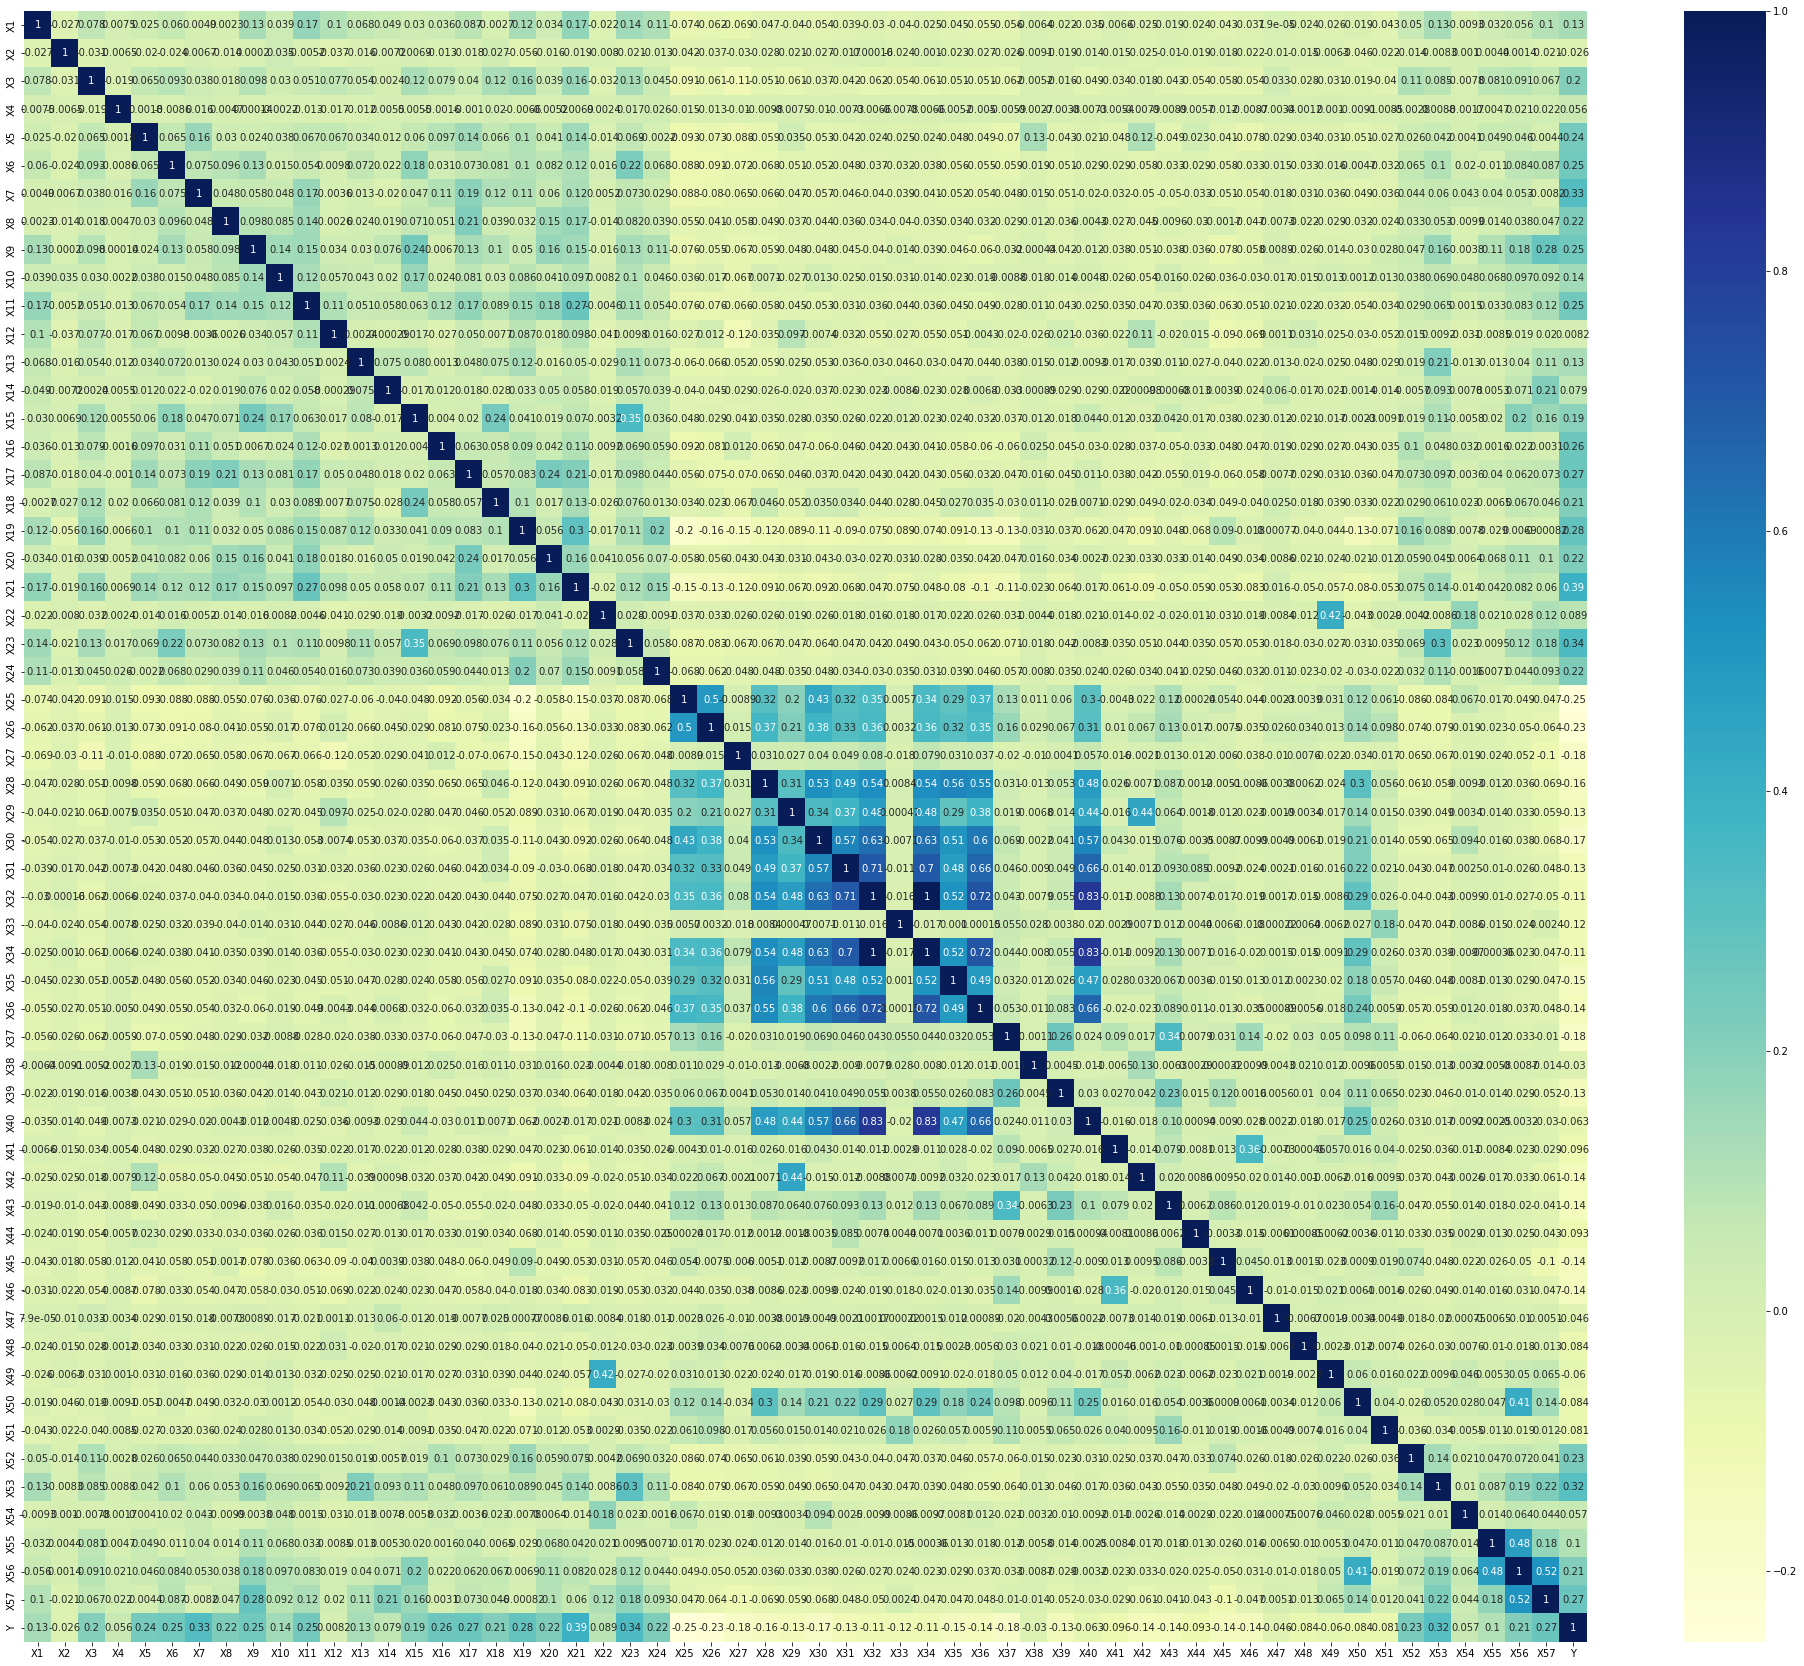

In [8]:
plt.figure(figsize=(35,30))
pearson = df.corr(method = 'pearson')
sns.heatmap(pearson, cmap="YlGnBu", annot=True)

Using Pearson Correlation Coefficient we notice the columns with the highest correlation. Some variables are higly correlated (>.8) so they will be dropped. In this case i'll drop X32 and X34

In [9]:
df = df.drop(['X32','X34'], axis = 1)

Provided with unknown features due to which i'm unable to understand the data.
updated few features  after some hit and trial with the help of correlation map.

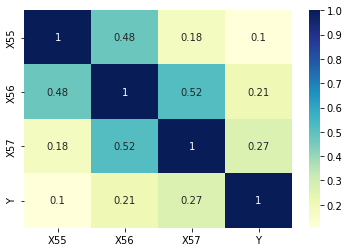

In [10]:
pearson = df[['X55','X56','X57','Y']].corr(method = 'pearson')
sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [11]:
df['X55'] = np.log(df['X55'])
df['X56'] = np.log(df['X56'])
df['X57'] = np.log(df['X57'])

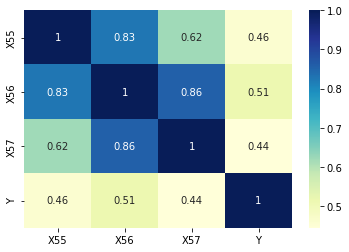

In [12]:
pearson = df[['X55','X56','X57','Y']].corr(method = 'pearson')
sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,:-1])
y = df[['Y']]

In [14]:
### The data has to be divided in training and test set.
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state= 42)

Tried with PCA but it does not give agood result i dropped the idea of using PCA



In [15]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components= 20)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model. 
logreg = LogisticRegression() 

# Training the model. 
logreg.fit(X_train,y_train) 

# Do prediction. 
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [18]:
cnf_matrix

array([[561,  37],
       [ 34, 346]])

In [19]:
metrics.accuracy_score(y_test, y_pred)


0.9274028629856851

Now do the same preprocessing for test_set given and predict the class with trained model.

In [20]:
df_test = pd.read_csv('test_set.csv', index_col = 0)
df_test = df_test.drop(['X32','X34'], axis = 1)


In [21]:
df_test['X55'] = np.log(df_test['X55'])
df_test['X56'] = np.log(df_test['X56'])
df_test['X57'] = np.log(df_test['X57'])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_finaltest = scaler.fit_transform(df_test)

In [23]:
#final prediction
y_pred=logreg.predict(X_finaltest)


In [24]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

We can also try with oversampling to balance data that improve the result